In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("telco-customer-churn.csv")

Understanding the dataset

In [4]:
df.shape

(7043, 21)

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2870,1400-WIVLL,Male,0,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,107.95,5969.85,No
3322,8058-JMEQO,Female,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.45,762.5,Yes
1850,3537-RYBHH,Female,1,Yes,No,47,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),67.45,3252,No
286,3808-HFKDE,Female,0,No,No,20,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.35,927.15,No
1332,4656-CAURT,Male,0,No,No,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1713.1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.duplicated().sum()

0

In [11]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3149,3629-WEAAM,Female,0,No,No,8,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,64.10,504.05,No
5394,5118-MUEYH,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
949,6169-PPETC,Male,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.50,759.35,No
5497,7614-QVWQL,Male,0,Yes,Yes,49,No,No phone service,DSL,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),51.80,2541.25,Yes
2223,8182-BJDSI,Female,0,No,No,28,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.95,2625.55,Yes


In [14]:
for col in df.columns:
    print(f"{col} : {df[col].unique()} , {df[col].nunique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] , 7043
gender : ['Female' 'Male'] , 2
SeniorCitizen : [0 1] , 2
Partner : ['Yes' 'No'] , 2
Dependents : ['No' 'Yes'] , 2
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] , 73
PhoneService : ['No' 'Yes'] , 2
MultipleLines : ['No phone service' 'No' 'Yes'] , 3
InternetService : ['DSL' 'Fiber optic' 'No'] , 3
OnlineSecurity : ['No' 'Yes' 'No internet service'] , 3
OnlineBackup : ['Yes' 'No' 'No internet service'] , 3
DeviceProtection : ['No' 'Yes' 'No internet service'] , 3
TechSupport : ['No' 'Yes' 'No internet service'] , 3
StreamingTV : ['No' 'Yes' 'No internet service'] , 3
StreamingMovies : ['No' 'Yes' 'No internet service'] , 3
Contract : ['Month-to-month' 'One year' 'Two year'] , 3
PaperlessBilling : ['Ye

In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [19]:
df.drop(columns = ['customerID'],inplace=True)

In [20]:
df.shape

(7043, 20)

In [29]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [30]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2520,Female,0,Yes,Yes,34,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,84.75,2839.45,No
3027,Female,0,No,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.70,137.60,No
660,Female,0,No,No,4,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.25,96.05,Yes
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65,No
2603,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No


In [32]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [36]:
df=df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [41]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(str)

<ipython-input-41-b7264bfb8f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen']=df['SeniorCitizen'].astype(str)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [66]:
import pickle

In [67]:
with open('dataset.pkl', 'wb') as file:
    pickle.dump(df, file)

EDA

<Axes: >

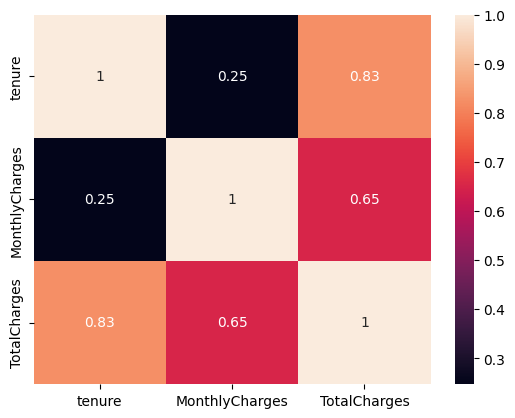

In [46]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [47]:
# Try removing correlation later

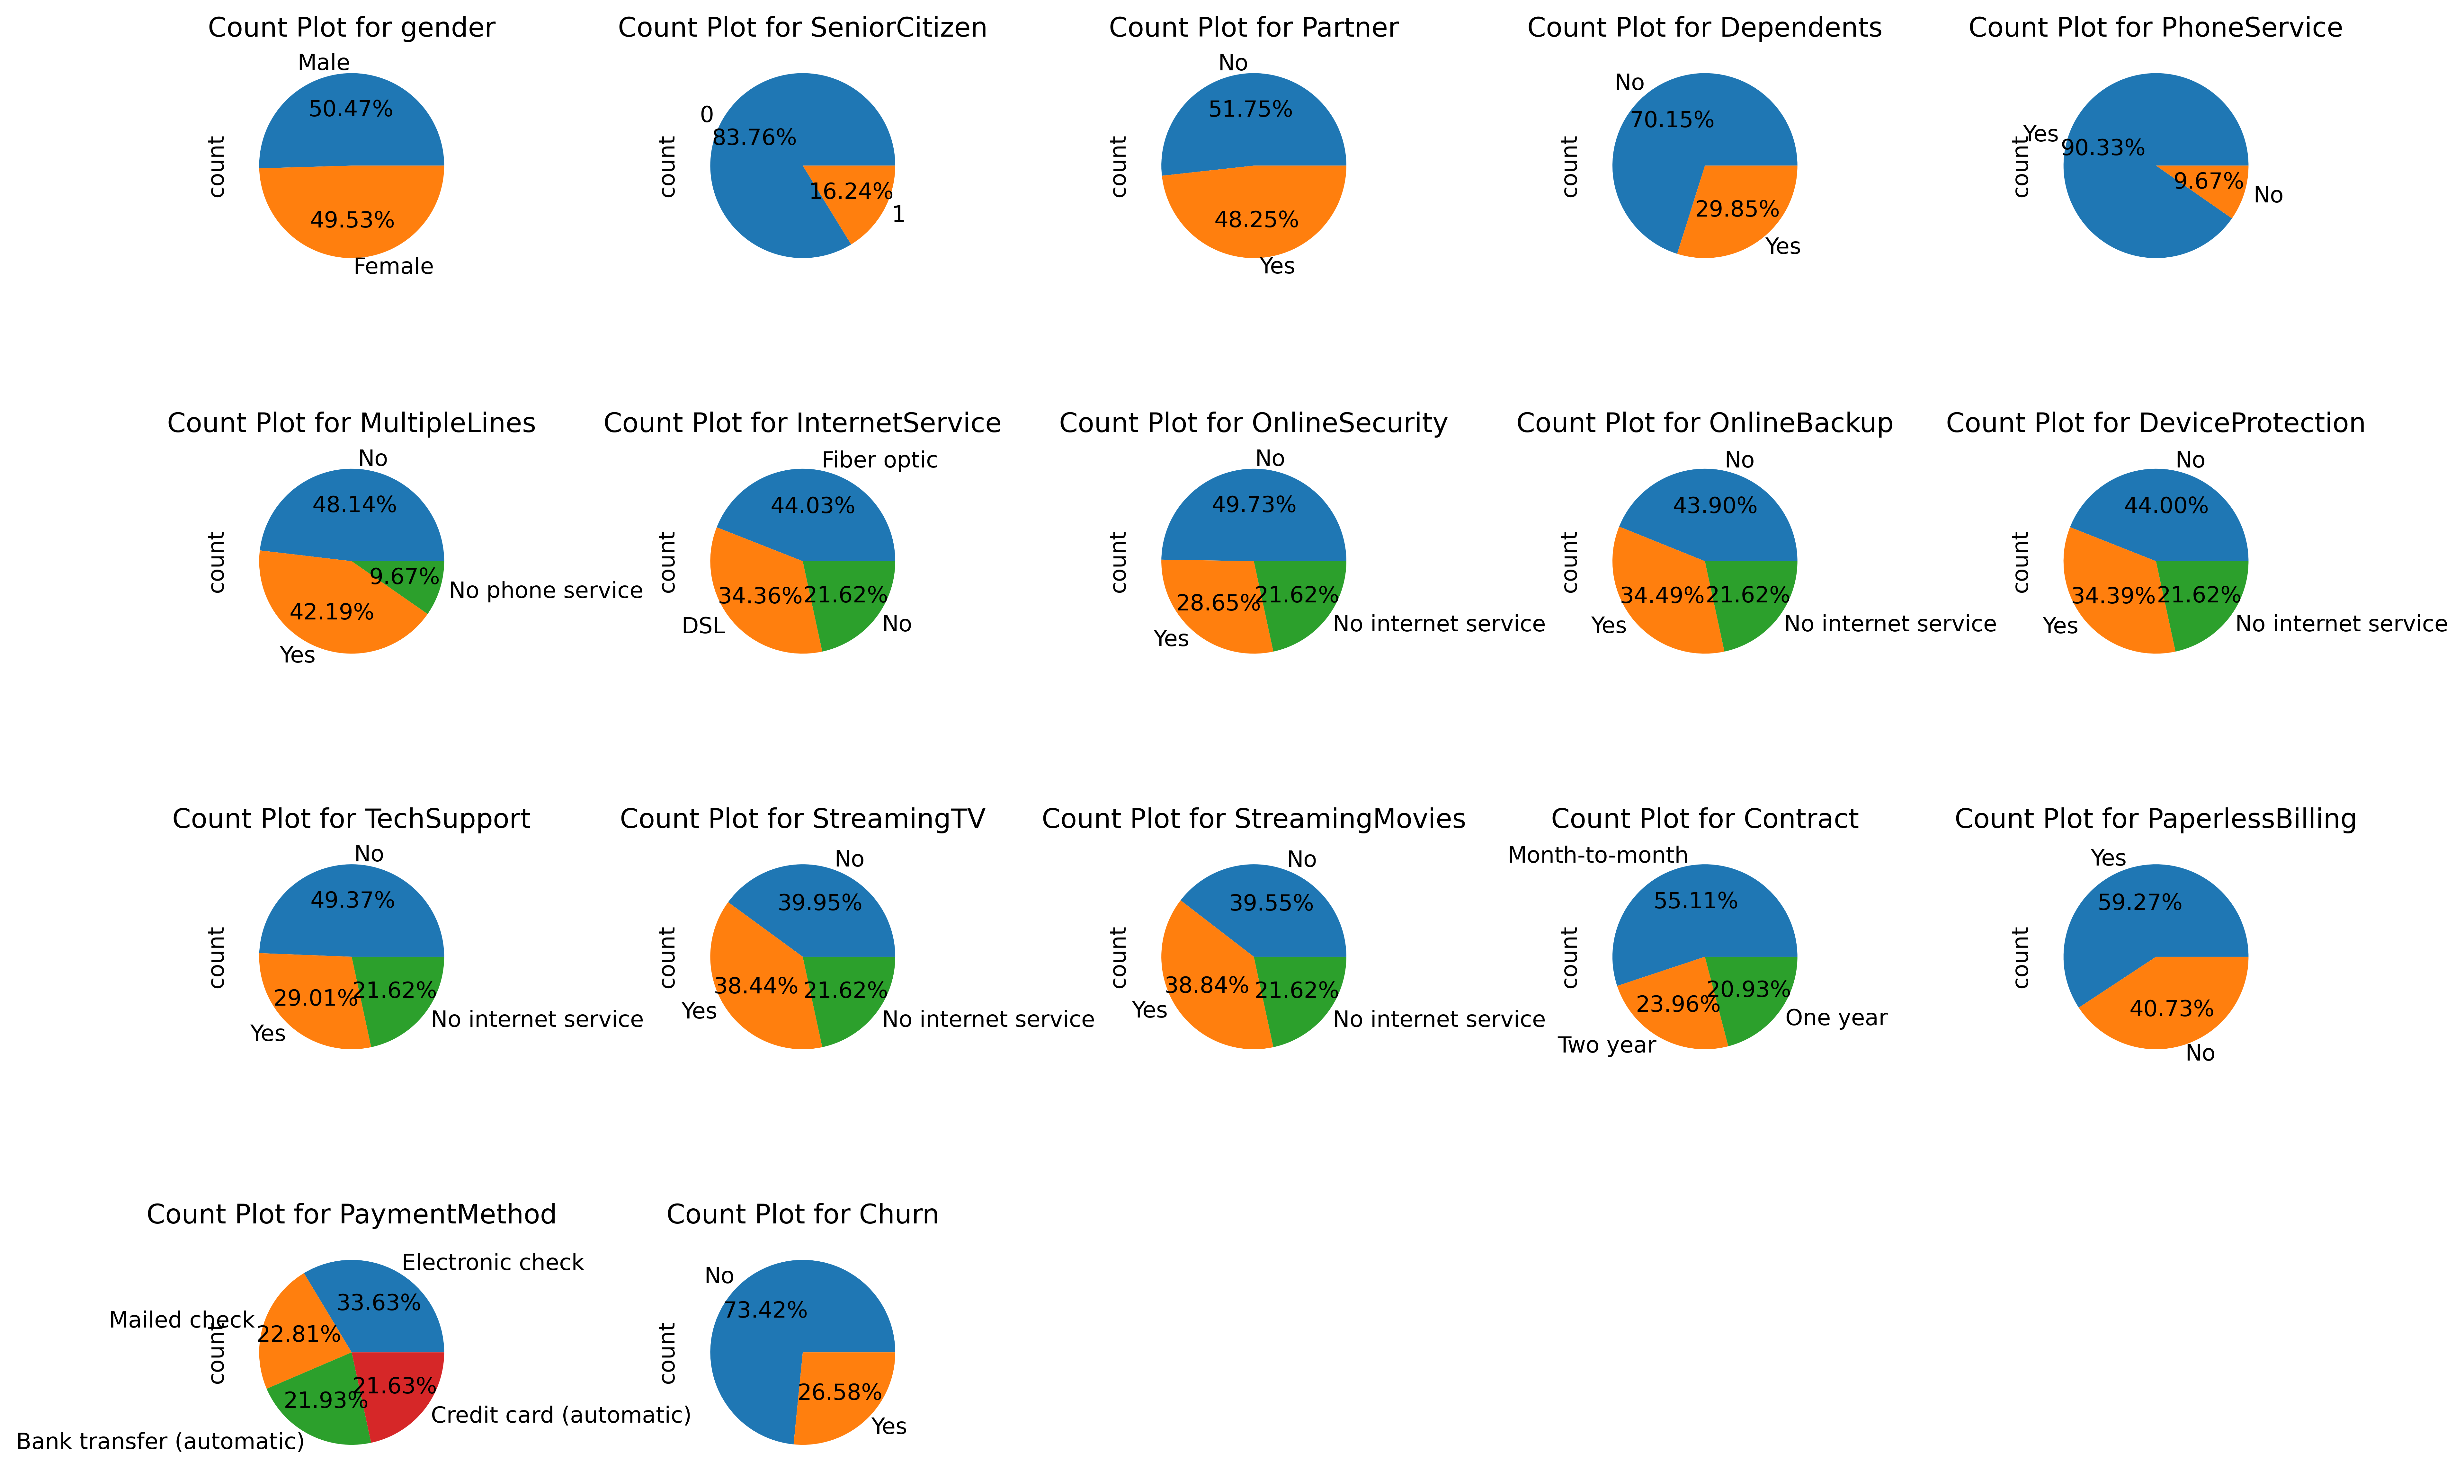

In [57]:
# Plotting each categorical column
plt.figure(figsize=(15, 10),dpi=500)

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 5, i)
    df[col].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

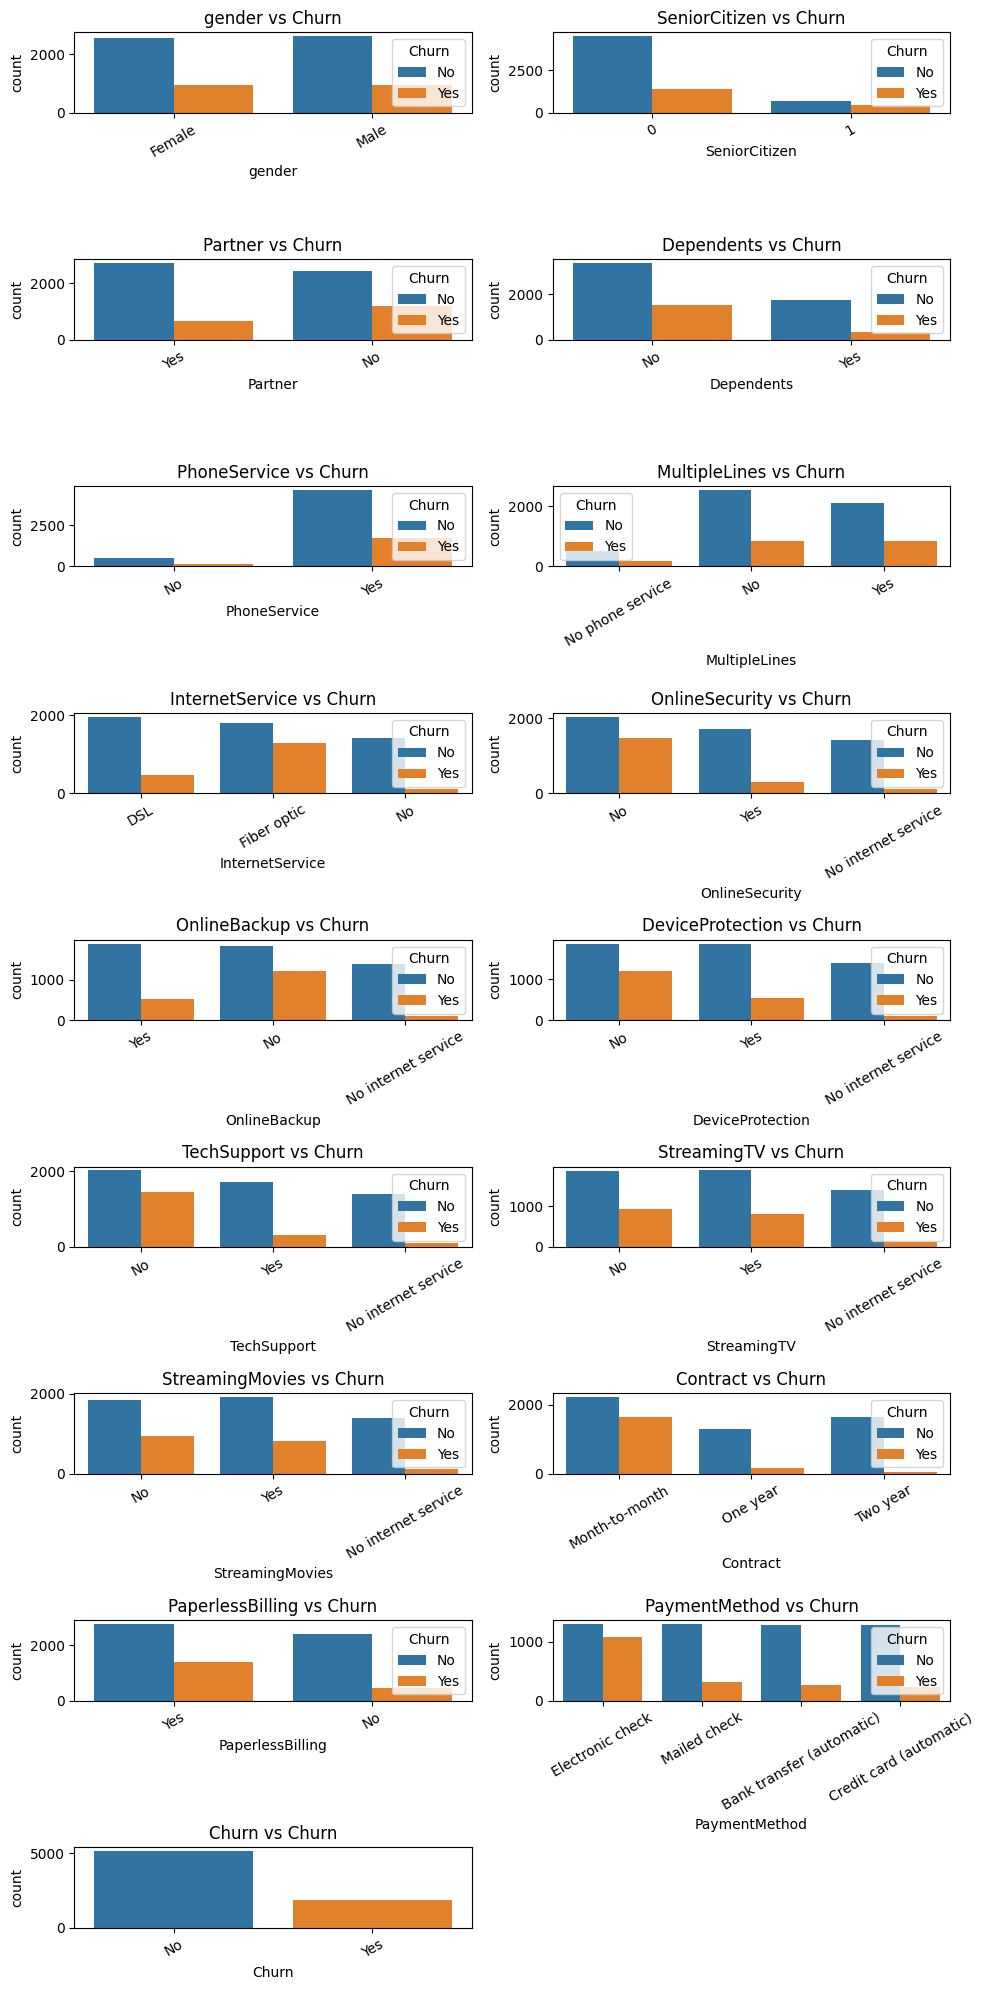

In [70]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) + 1) // 2, 2, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

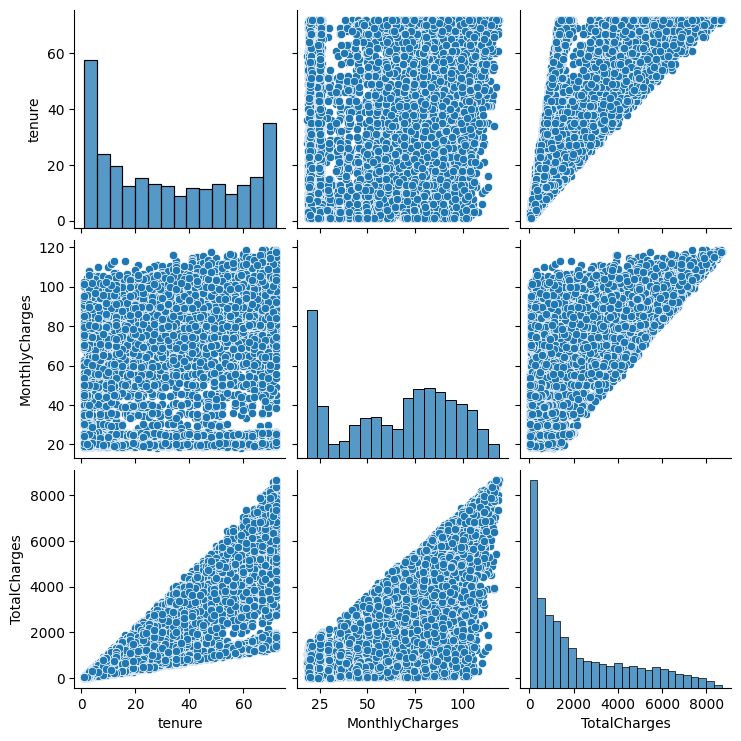

In [71]:
sns.pairplot(df)

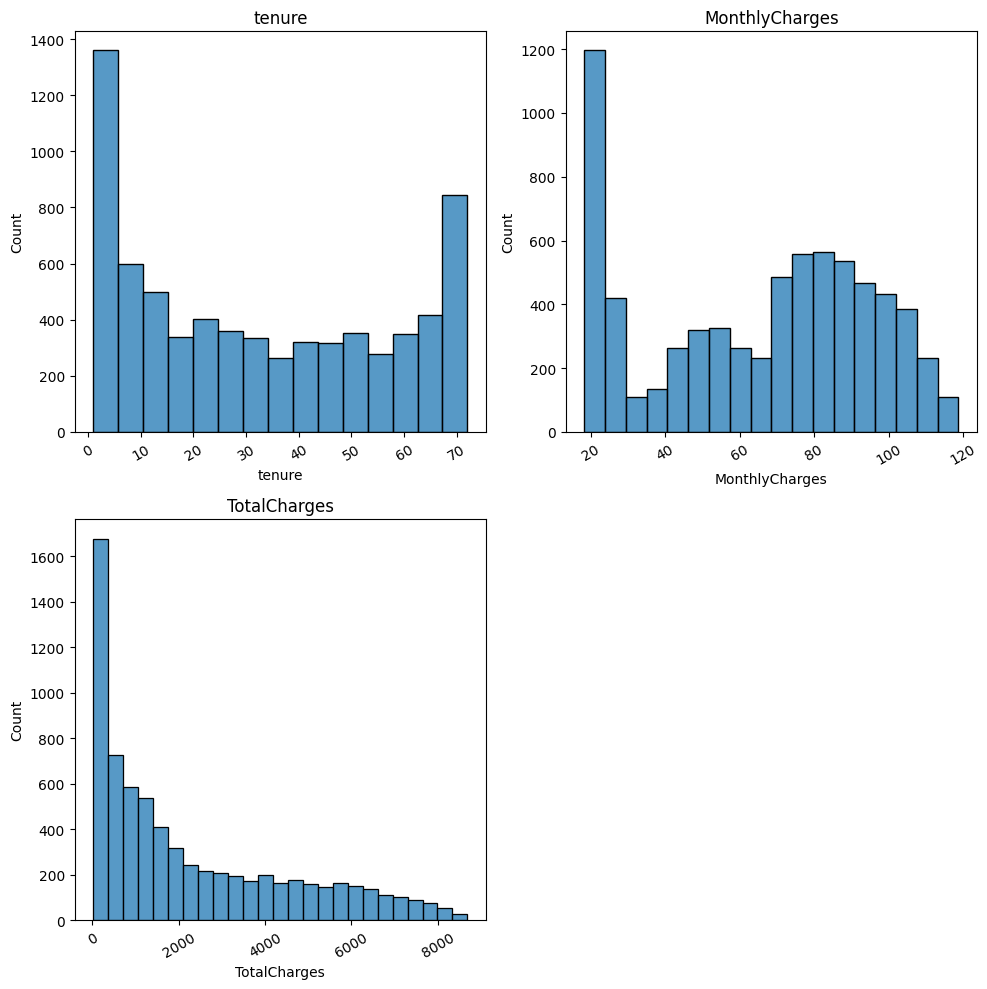

In [80]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.histplot(x=col, data=df)
    plt.title(f'{col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [95]:
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [96]:
df.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869


In [97]:
#data is unbalanced

In [98]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [101]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [102]:
y_resampled.value_counts()

,count
Churn,
No,1869
Yes,1869


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder

In [109]:
cat_cols.remove('Churn')

In [111]:
transformation = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [116]:
X_train_transformed = pd.DataFrame(transformation.fit_transform(X_train),columns = transformation.get_feature_names_out())

In [124]:
X_test_transformed = pd.DataFrame(transformation.transform(X_test),columns = transformation.get_feature_names_out())

In [120]:
le = LabelEncoder()

In [121]:
y_train_transformed = le.fit_transform(y_train)

In [122]:
y_test_transformed = le.transform(y_test)

In [132]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define Models and Hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    }
}

# Store Results
results = []

# Hyperparameter Tuning and Evaluation
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    clf.fit(X_train_transformed, y_train_transformed)

    # Best Model
    best_model = clf.best_estimator_

    # Accuracy Scores
    train_acc = accuracy_score(y_train_transformed, best_model.predict(X_train_transformed))
    test_acc = accuracy_score(y_test_transformed, best_model.predict(X_test_transformed))

    # Store Results
    results.append({
        'Model': model_name,
        'Best Params': clf.best_params_,
        'Train Accuracy': round(train_acc * 100, 2),
        'Test Accuracy': round(test_acc * 100, 2)
    })

# --------------------- Stacking Classifier ---------------------
# Base Models for Stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)),
    ('svc', SVC(C=1, kernel='rbf', probability=True))  # For compatibility in Stacking
]

# Stacking Classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stack_model.fit(X_train_transformed, y_train_transformed)

# Stacking Accuracy
stack_train_acc = accuracy_score(y_train_transformed, stack_model.predict(X_train_transformed))
stack_test_acc = accuracy_score(y_test_transformed, stack_model.predict(X_test_transformed))

# Add Stacking Results
results.append({
    'Model': 'Stacking Classifier',
    'Best Params': 'N/A',
    'Train Accuracy': round(stack_train_acc * 100, 2),
    'Test Accuracy': round(stack_test_acc * 100, 2)
})

# Display Results
results_df = pd.DataFrame(results)
print(results_df)


                 Model                                        Best Params  \
0  Logistic Regression                      {'C': 0.1, 'solver': 'lbfgs'}   
1        Random Forest  {'max_depth': 10, 'min_samples_split': 10, 'n_...   
2                  SVM                          {'C': 1, 'kernel': 'rbf'}   
3              XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
4                  KNN           {'n_neighbors': 5, 'weights': 'uniform'}   
5        Decision Tree           {'criterion': 'entropy', 'max_depth': 5}   
6    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
7             AdaBoost          {'learning_rate': 1, 'n_estimators': 200}   
8  Stacking Classifier                                                N/A   

   Train Accuracy  Test Accuracy  
0           76.22          76.74  
1           84.21          75.80  
2           78.43          76.07  
3           79.33          75.94  
4           80.64          73.13  
5           76.29  

In [126]:
lr = LogisticRegression(C=0.1, solver='lbfgs')

In [127]:
lr.fit(X_train_transformed,y_train_transformed)

LogisticRegression(C=0.1)

In [128]:
accuracy_score(y_test_transformed,lr.predict(X_test_transformed))

0.767379679144385

In [129]:
accuracy_score(y_train_transformed,lr.predict(X_train_transformed))

0.7622073578595318

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test_transformed,lr.predict(X_test_transformed))

array([[282,  97],
       [ 77, 292]])

In [133]:
ab = AdaBoostClassifier(n_estimators=200, learning_rate=1)

In [134]:
ab = ab.fit(X_train_transformed,y_train_transformed)

In [136]:
accuracy_score(y_test_transformed,ab.predict(X_test_transformed))

0.766042780748663

In [137]:
accuracy_score(y_train_transformed,ab.predict(X_train_transformed))

0.774247491638796

In [138]:
confusion_matrix(y_test_transformed,ab.predict(X_test_transformed))

array([[275, 104],
       [ 71, 298]])

In [139]:
with open('column_transformations.pkl', 'wb') as file:
    pickle.dump(transformation, file)

In [140]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [141]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [142]:
with open('ab_model.pkl', 'wb') as file:
    pickle.dump(ab, file)